In [1]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip show tensorflow

Name: tensorflow
Version: 2.16.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/sandeep/.local/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow import keras

2024-07-08 19:42:18.645818: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-08 19:42:18.657097: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 19:42:18.674305: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 19:42:18.674399: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-08 19:42:18.684903: I tensorflow/core/platform/cpu_feature_gua

In [5]:
keras.__version__

'3.4.1'

In [6]:
tf.__version__

'2.16.2'

## Image classifier using neural networks

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

<!-- ![image.png](attachment:image.png) -->

### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full[0].shape

(28, 28)

In [9]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

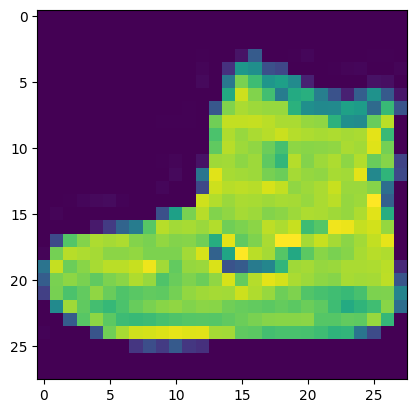

In [10]:
plt.imshow(X_train_full[0]) # 1st picture       

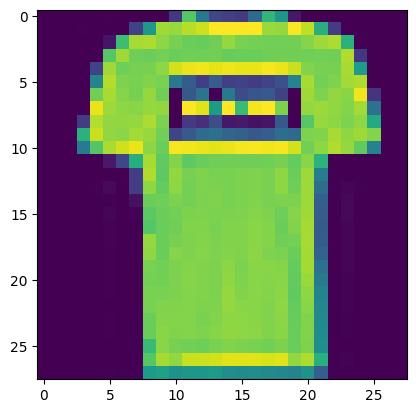

In [11]:
plt.imshow(X_train_full[1]) # 2nd picture in training data

In [12]:
y_train_full[0] # returns the index of class of which 1st image belongs to

9

In [13]:
class_names = ["T-shirt/top", "Trouser", 
            "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train_full[0]], class_names[y_train_full[1]]

('Ankle boot', 'T-shirt/top')

### Data normalization
normalizing the data dimensions so that they are of approximately of same scale

In [15]:
X_train_n = X_train_full / 255.0 # 255 stands for completely white pixel and 0 - black
X_test_n  = X_test / 255.0 

In [16]:
# here as we know that the pixel maximum is 255, we can directly normalize the data as shown abive

In [17]:

X_test_n

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [18]:
X_train_n.shape # 60,000 training samples

(60000, 28, 28)

In [19]:
X_test_n.shape # 10,000 training samples

(10000, 28, 28)

### splitting the data into train/validation/test

- validation set is use for tuning the hyperparameters and evaluate the models

In [20]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000: ]  
# 5000 for validation, 55000 for training and 10000 for testing
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Create the model architecture
There are two APIs for defining a model in Keras:
* Sequential model API
* Functional API

In [21]:
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
# we have image of (28 * 28) pixel
# there are 10 categories in the output

input layer
---> hidden layer 1
---> hidden layer 2
---> Output layer 

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))     # input layer
model.add(keras.layers.Dense(300, activation = "relu"))     # hidden layer 1
model.add(keras.layers.Dense(150, activation = "relu"))     # hidden layer 2
model.add(keras.layers.Dense(10, activation = "softmax"))   # output layer 

/home/sandeep/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-07-08 19:42:21.769950: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2024-07-08 19:42:21.769976: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: sandeep-ubuntu
2024-07-08 19:42:21.769979: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: sandeep-ubuntu
2024-07-08 19:42:21.770100: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 545.23.8
2024-07-08 19:42:21.770113: I external/local_xla/xla/st

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,160 (1.08 MB)

 Trainable params: 282,160 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
import pydot

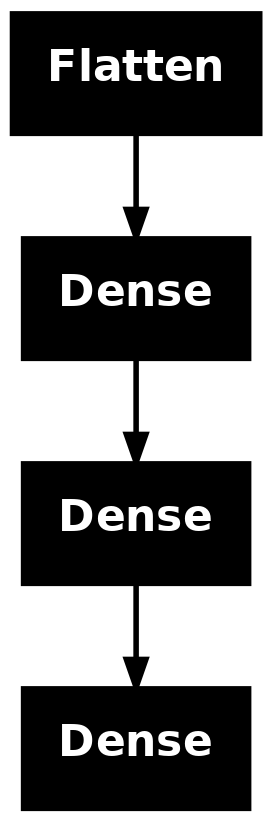

In [26]:
keras.utils.plot_model(model)


In [27]:
weights, biases = model.layers[1].get_weights()

In [28]:
weights

array([[ 0.04118813,  0.03559364,  0.00593743, ..., -0.01816871,
        -0.01270545, -0.03821225],
       [ 0.05968679, -0.07025744,  0.01487718, ..., -0.0371801 ,
        -0.04346438,  0.02278244],
       [-0.01688958,  0.07276024,  0.05005611, ..., -0.05318978,
        -0.04001103,  0.0568558 ],
       ...,
       [ 0.07100071,  0.0657144 ,  0.05485694, ...,  0.05020575,
        -0.00454838,  0.05345389],
       [ 0.00394827, -0.01818864, -0.03014562, ...,  0.07080449,
         0.04905157,  0.0386376 ],
       [-0.02578348,  0.05155377,  0.04641665, ...,  0.02741808,
         0.02420988, -0.05650093]], dtype=float32)

In [29]:
weights.shape

(784, 300)

In [30]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["acuuracy"])